In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
#import pandas_datareader.data as web
from pandas_datareader import data as pdr
import pickle 
import requests
import yfinance as yf
yf.pdr_override()
import datetime as dt
from fake_useragent import UserAgent
ua=UserAgent()
import requests
sesh = requests.Session()

In [2]:
image_path = 'D:/kenneth/agent/images/'
ticker = '^GSPC'
# start=('2019-01-01')
# end=('2019-12-31')
start = dt.datetime(1970, 1, 1)
end = dt.datetime.today()
df =pdr.get_data_yahoo(ticker, start, end, session=sesh)
#df=web.DataReader(ticker,'yahoo',start,end)
df.to_csv(ticker+'.csv')
#df = pd.read_csv('D:/kenneth/agent/'+ticker+'.csv', index_col=0, parse_dates=True)
#df = pd.read_csv('D:/kenneth/models/data/sp500/prices/data/'+ticker+'.csv', index_col=0, parse_dates=True)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1970-01-02,0.0,93.540001,91.790001,93.000000,93.000000,8050000
1970-01-05,0.0,94.250000,92.529999,93.459999,93.459999,11490000
1970-01-06,0.0,93.809998,92.129997,92.820000,92.820000,11460000
1970-01-07,0.0,93.379997,91.930000,92.629997,92.629997,10010000
1970-01-08,0.0,93.470001,91.989998,92.680000,92.680000,10670000


#  Agents

* Turtle Trading agent
* Moving Average agent
* Signal Rolling agent
* Policy Gradient agent
* Q-learning agent
* Evolution Strategy agent
* Double Q-learning agent
* Recurrent Q-learning agent
* Double Recurrent Q-learning agent
* Duel Q-learning agent
* Double Duel Q-learning agent
* Duel Recurrent Q-learning agent
* Double Duel Recurrent Q-learning agent
* Actor-critic agent
* Actor-critic Duel agent
* Actor-critic Recurrent agent
* Actor-critic Duel Recurrent agent
* Curiosity Q-learning agent
* Recurrent Curiosity Q-learning agent
* Duel Curiosity Q-learning agent
* Neuro-evolution agent
* Neuro-evolution with Novelty search agent
* ABCD strategy agent
* Deep Evolution Strategy

## Signal Rolling agent

In [3]:
name = 'Signal Rolling agent'

In [4]:
def buy_stock(
    real_movement,
    delay = 5,
    initial_state = 1,
    initial_money = 10000,
    max_buy = 1,
    max_sell = 1,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 1000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    starting_money = initial_money
    delay_change_decision = delay
    current_decision = 0
    state = initial_state
    current_val = real_movement[0]
    states_sell = []
    states_buy = []
    current_inventory = 0

    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory

    if state == 1:
        initial_money, current_inventory = buy(
            0, initial_money, current_inventory
        )

    for i in range(1, real_movement.shape[0], 1):
        if real_movement[i] < current_val and state == 0:
            if current_decision < delay_change_decision:
                current_decision += 1
            else:
                state = 1
                initial_money, current_inventory = buy(
                    i, initial_money, current_inventory
                )
                current_decision = 0
                states_buy.append(i)
        if real_movement[i] > current_val and state == 1:
            if current_decision < delay_change_decision:
                current_decision += 1
            else:
                state = 0

                if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
                else:
                    if current_inventory > max_sell:
                        sell_units = max_sell
                    else:
                        sell_units = current_inventory
                    current_inventory -= sell_units
                    total_sell = sell_units * real_movement[i]
                    initial_money += total_sell
                    try:
                        invest = (
                            (real_movement[i] - real_movement[states_buy[-1]])
                            / real_movement[states_buy[-1]]
                        ) * 100
                    except:
                        invest = 0
                    print(
                        'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                        % (i, sell_units, total_sell, invest, initial_money)
                    )

                current_decision = 0
                states_sell.append(i)
        current_val = real_movement[i]
    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest

In [5]:
states_buy, states_sell, total_gains, invest = buy_stock(df.Close, initial_state = 1, 
                                                         delay = 4, initial_money = 10000)

day 0: buy 1 units at price 93.000000, total balance 9907.000000
day 12, sell 1 units at price 89.830002, investment -3.408600 %, total balance 9996.830002,
day 19: buy 1 units at price 85.690002, total balance 9911.139999
day 28, sell 1 units at price 86.940002, investment 1.458747 %, total balance 9998.080002,
day 36: buy 1 units at price 87.989998, total balance 9910.090004
day 46, sell 1 units at price 88.750000, investment 0.863737 %, total balance 9998.840004,
day 53: buy 1 units at price 87.419998, total balance 9911.420006
day 67, sell 1 units at price 88.529999, investment 1.269733 %, total balance 9999.950005,
day 72: buy 1 units at price 85.879997, total balance 9914.070007
day 93, sell 1 units at price 76.900002, investment -10.456446 %, total balance 9990.970009,
day 100: buy 1 units at price 69.290001, total balance 9921.680008
day 106, sell 1 units at price 78.519997, investment 13.320819 %, total balance 10000.200005,
day 112: buy 1 units at price 74.449997, total balan

day 11161: buy 1 units at price 1849.040039, total balance 9723.380661
day 11169, sell 1 units at price 1851.959961, investment 0.157916 %, total balance 11575.340622,
day 11185: buy 1 units at price 1883.680054, total balance 9691.660568
day 11193, sell 1 units at price 1897.449951, investment 0.731010 %, total balance 11589.110519,
day 11207: buy 1 units at price 1924.239990, total balance 9664.870529
day 11215, sell 1 units at price 1936.160034, investment 0.619468 %, total balance 11601.030563,
day 11230: buy 1 units at price 1977.650024, total balance 9623.380539
day 11239, sell 1 units at price 1978.219971, investment 0.028819 %, total balance 11601.600510,
day 11249: buy 1 units at price 1925.150024, total balance 9676.450485
day 11257, sell 1 units at price 1946.719971, investment 1.120429 %, total balance 11623.170456,
day 11271: buy 1 units at price 2000.719971, total balance 9622.450485
day 11281, sell 1 units at price 2001.569946, investment 0.042483 %, total balance 11624.

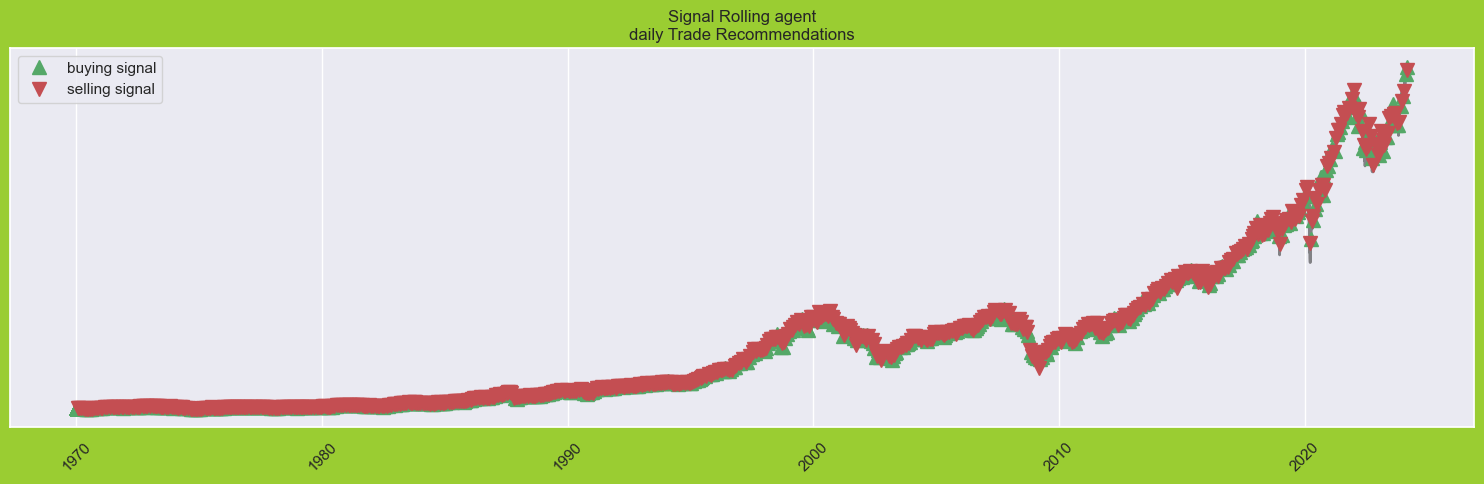

In [6]:
close = df['Close']
fig = plt.figure(figsize = (15,5), facecolor='yellowgreen', dpi=100)
plt.plot(close, color='k', lw=2., alpha=0.5)
plt.plot(close, '^', markersize=10, color='g', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='r', label = 'selling signal', markevery = states_sell)
plt.title(name+'\n'+'daily Trade Recommendations')
plt.xticks(rotation=45)
plt.legend()
plt.gca().axes.get_yaxis().set_visible(False)
fig.tight_layout()
plt.savefig('images/'+ticker+name+'.png', facecolor='yellowgreen', dpi=100)
plt.show()

In [11]:
display_days = 90
total_days= df.shape[0]
display_from = total_days-display_days

In [12]:
new_buy = []
for i in(states_buy):
    if i > display_from:
        adj = i- display_from
        new_buy.append(adj)
new_buy

[21, 44, 71, 89]

In [13]:
new_sell = []
for i in(states_sell):
    if i > display_from:
        adj = i- display_from
        new_sell.append(adj)
new_sell

[3, 29, 54, 79]

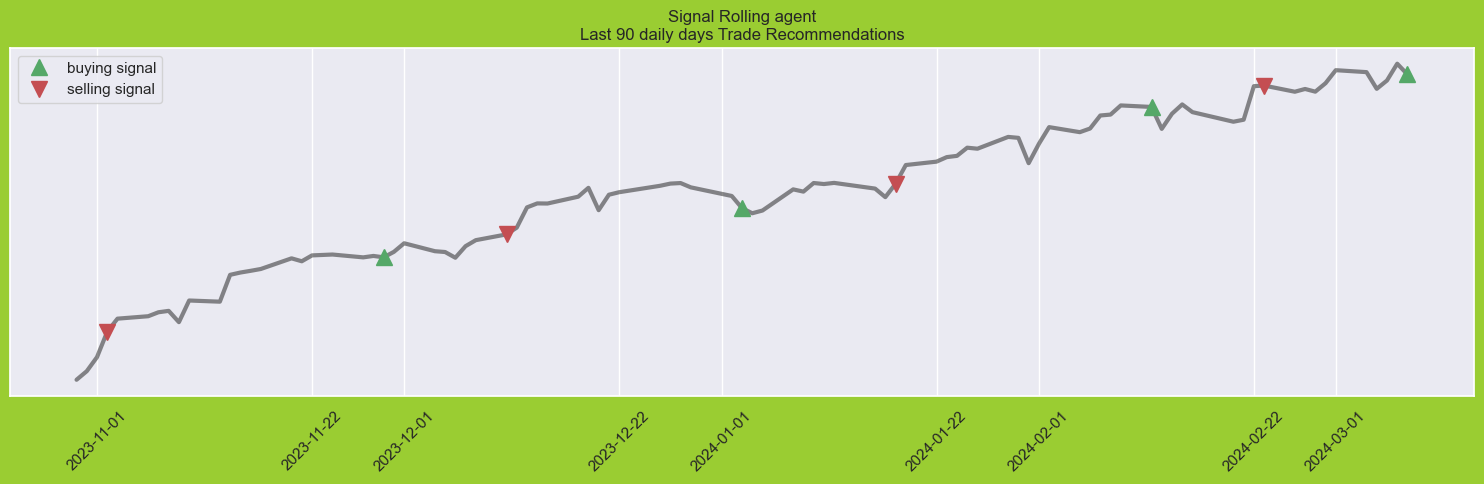

In [14]:
close = df['Close'][-display_days:]
fig = plt.figure(figsize = (15,5), facecolor='yellowgreen', dpi=100)
plt.plot(close, color='k', lw=3., alpha=0.5)
plt.plot(close, '^', markersize=12, color='g',alpha=1.0,label = 'buying signal', markevery = new_buy)
plt.plot(close, 'v', markersize=12, color='r',alpha=1.0, label = 'selling signal', markevery = new_sell)
plt.title(name+'\n'+'Last '+str(display_days)+' daily days Trade Recommendations')
plt.xticks(rotation=45)
plt.legend()
plt.gca().axes.get_yaxis().set_visible(False)
fig.tight_layout()
#plt.savefig('images/'+ticker+name+'.png', facecolor='yellowgreen', dpi=100)
plt.show()